In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from wordcloud import WordCloud

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('movies_complete.csv')

In [4]:
df.director.value_counts().head(20)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: director, dtype: int64

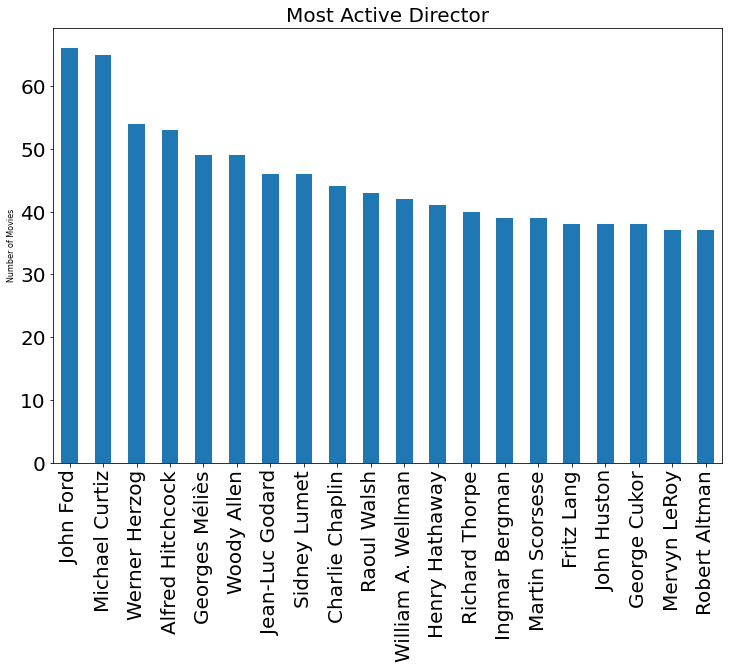

In [5]:
plt.figure(figsize=(12,8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 20)
plt.title("Most Active Director", fontsize =20)
plt.ylabel("Number of Movies", fontsize = 8)
plt.show()

In [6]:
df.groupby('director').revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

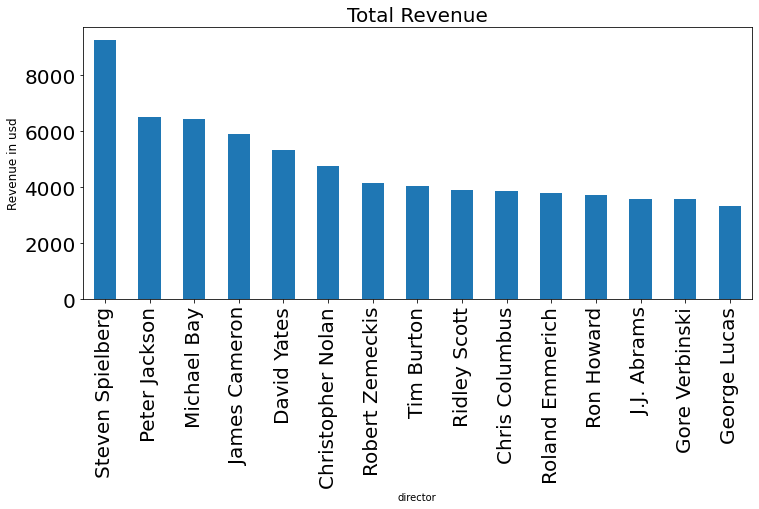

In [7]:
plt.figure(figsize=(12,5))
df.groupby('director').revenue_musd.sum().nlargest(15).plot(kind='bar', fontsize = 20)
plt.title("Total Revenue", fontsize =20)
plt.ylabel("Revenue in usd", fontsize = 12)
plt.show()

In [8]:
director = df.groupby("director").agg({"title" :"count", "budget_musd":["sum","mean"], "revenue_musd": ["sum", "mean"],
                                    "vote_average":"mean", "popularity":'mean', "vote_count":"mean" })
director

title budget_musd      revenue_musd      vote_average  \
                    count         sum mean          sum mean         mean   
director                                                                    
 Dale Trevillion\t      2        0.00  NaN         0.00  NaN         4.00   
 Davide Manuli          1        0.00  NaN         0.00  NaN         6.90   
 E.W. Swackhamer        1        0.00  NaN         0.00  NaN         5.90   
 Vitaliy Vorobyov       1        0.00  NaN         0.00  NaN         5.50   
 Yeon Sang-Ho           4        8.95 4.48         2.13 2.13         6.60   
...                   ...         ...  ...          ...  ...          ...   
Ярополк Лапшин          1        0.00  NaN         0.00  NaN        10.00   
پیمان معادی             1        0.00  NaN         0.00  NaN         6.00   
塩谷 直義                   1        0.00  NaN         0.00  NaN         7.20   
杰森·莫玛                   1        0.00  NaN         0.00  NaN         5.80   
진모영                     1        0.00  NaN         0.00  NaN         6.00   

                    popularity vote_count  
                          mean       mean  
director                                   
 Dale Trevillion\t        0.04       2.00  
 Davide Manuli            1.03      10.00  
 E.W. Swackhamer          0.01       5.00  
 Vitaliy Vorobyov         0.48       3.00  
 Yeon Sang-Ho             6.84     259.75  
...                        ...        ...  
Ярополк Лапшин            0.00       1.00  
پیمان معادی               0.18       2.00  
塩谷 直義                     4.30      40.00  
杰森·莫玛                     3.76      28.00  
진모영                       0.44       6.00  

[17349 rows x 8 columns]

In [9]:
director.nlargest(5,('title','count'))

title budget_musd      revenue_musd       vote_average  \
                 count         sum mean          sum  mean         mean   
director                                                                  
John Ford           66       35.62 2.74        85.17  8.52         6.38   
Michael Curtiz      65       10.80 1.54        37.82  7.56         6.00   
Werner Herzog       54       58.38 4.86        24.57  6.14         6.81   
Alfred Hitchcock    53       48.67 2.03       250.11 11.91         6.64   
Georges Méliès      49        0.01 0.01         0.00   NaN         5.93   

                 popularity vote_count  
                       mean       mean  
director                                
John Ford              3.05      33.48  
Michael Curtiz         2.11      38.09  
Werner Herzog          2.32      46.59  
Alfred Hitchcock       6.50     240.98  
Georges Méliès         0.65      16.86

In [10]:
director.nlargest(5,('revenue_musd','sum'))

title budget_musd        revenue_musd        vote_average  \
                 count         sum   mean          sum   mean         mean   
director                                                                     
Steven Spielberg    33     1736.95  56.03      9256.62 308.55         6.89   
Peter Jackson       13     1326.78 102.06      6528.24 593.48         7.14   
Michael Bay         13     1670.00 128.46      6437.47 495.19         6.39   
James Cameron       11      760.05  84.45      5900.61 737.58         6.93   
David Yates          9     1135.00 189.17      5334.56 889.09         6.70   

                 popularity vote_count  
                       mean       mean  
director                                
Steven Spielberg      13.02    1886.85  
Peter Jackson         18.84    3659.31  
Michael Bay           12.78    2212.85  
James Cameron         28.07    3066.91  
David Yates           19.99    3450.67

In [11]:
    director[director['vote_count','mean']>1000].nlargest(5,('vote_average','mean'))

title budget_musd        revenue_musd        vote_average  \
                count         sum   mean          sum   mean         mean   
director                                                                    
Garth Davis         1       12.00  12.00       140.30 140.30         8.00   
Tony Kaye           3       20.00  20.00        23.95   7.98         7.87   
Hayao Miyazaki     14      145.08  20.73       995.90 142.27         7.70   
Stephen Chbosky     1       13.00  13.00        33.40  33.40         7.70   
Jan Pinkava         2      150.00 150.00       623.72 623.72         7.65   

                popularity vote_count  
                      mean       mean  
director                               
Garth Davis          17.09    1699.00  
Tony Kaye             7.75    1158.00  
Hayao Miyazaki       11.55    1050.00  
Stephen Chbosky      12.78    3056.00  
Jan Pinkava          12.64    2409.50

In [12]:
direc = df.groupby('director').agg({'title':'count', 'vote_average':'mean','vote_count':'mean'})
direc

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,2.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,259.75
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [13]:
direc[direc.vote_count>=1000].nlargest(5, 'vote_average')

,title,vote_average,vote_count
director,,,
Garth Davis,1,8.00,1699.00
Tony Kaye,3,7.87,1158.00
Hayao Miyazaki,14,7.70,1050.00
Stephen Chbosky,1,7.70,3056.00
Jan Pinkava,2,7.65,2409.50


In [14]:
df.genres = df.genres.astype(str)

In [15]:
#mencari filmm genre horor dan director nya berdasarkan pendapatan

df.loc[df.genres.str.contains('Horror')].groupby('director').revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

In [16]:
''' MOST SUCCESFULL ACTORS'''
df.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [17]:
df.set_index("id",inplace=True)


In [18]:
actor = df.cast.str.split("|",expand=True)

In [19]:
actor= actor.stack().reset_index(level=1, drop=True).to_frame()

In [20]:
actor.columns = ['Actor']

In [21]:
actor

,Actor
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [22]:
actor = actor.merge(df[['title', 'revenue_musd','vote_average', 'popularity']],how='left',left_index=True,right_index=True)

In [23]:
actor

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


In [24]:
actor.Actor.nunique()

201501

In [25]:
actor.Actor.unique()


array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [26]:
actor.Actor.value_counts().head(20)

Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: Actor, dtype: int64

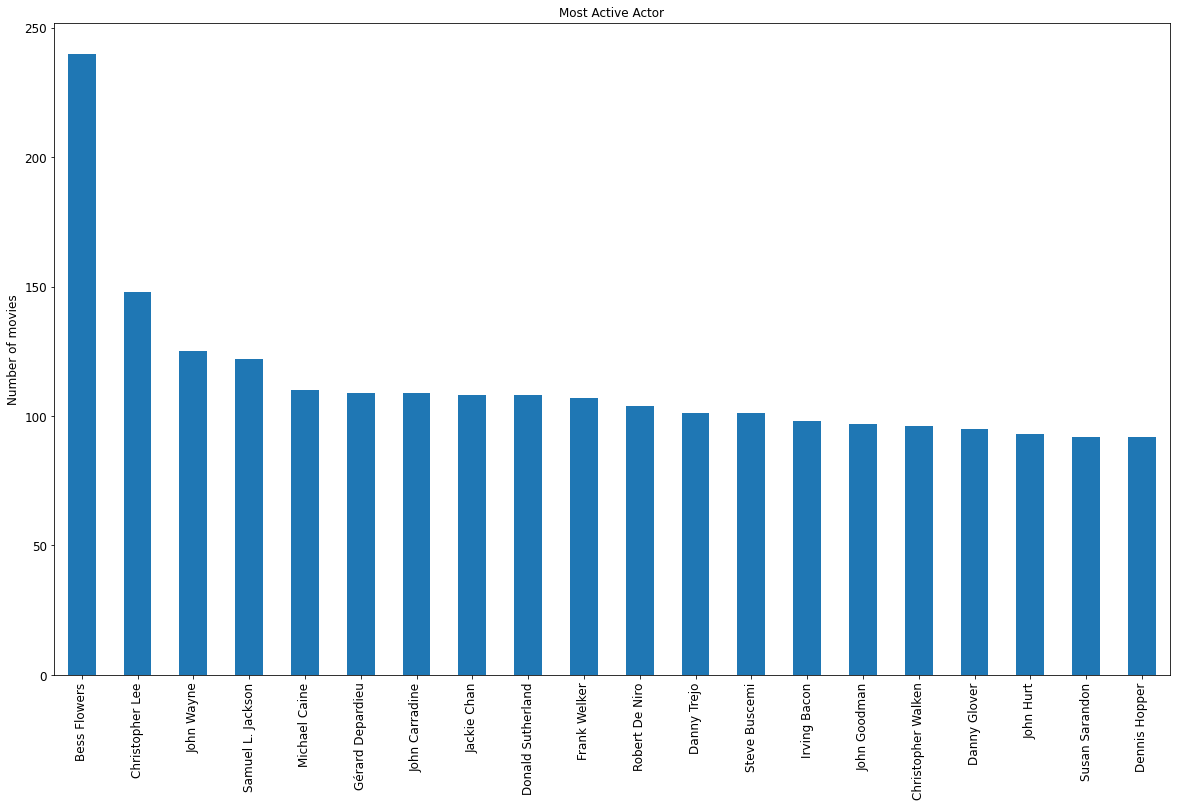

In [27]:
plt.figure(figsize=(20,12))
actor.Actor.value_counts().head(20).plot(kind='bar',fontsize=12)
plt.title("Most Active Actor", fontsize=12)
plt.ylabel("Number of movies", fontsize = 12 )
plt.show()

In [28]:
agg = actor.groupby('Actor').agg(Total_revenue = ('revenue_musd','sum'),
                            Mean_revenue =('revenue_musd','mean'),
                            Mean_rating =('vote_average','mean'),
                            Mean_pop =('popularity','mean'),
                            Total_movie= ('Actor','count'))

In [29]:
# Top actor by revenue
agg.nlargest(10,"Total_revenue")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movie
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


In [30]:
#most active actor
agg.nlargest(10,"Total_movie")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movie
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


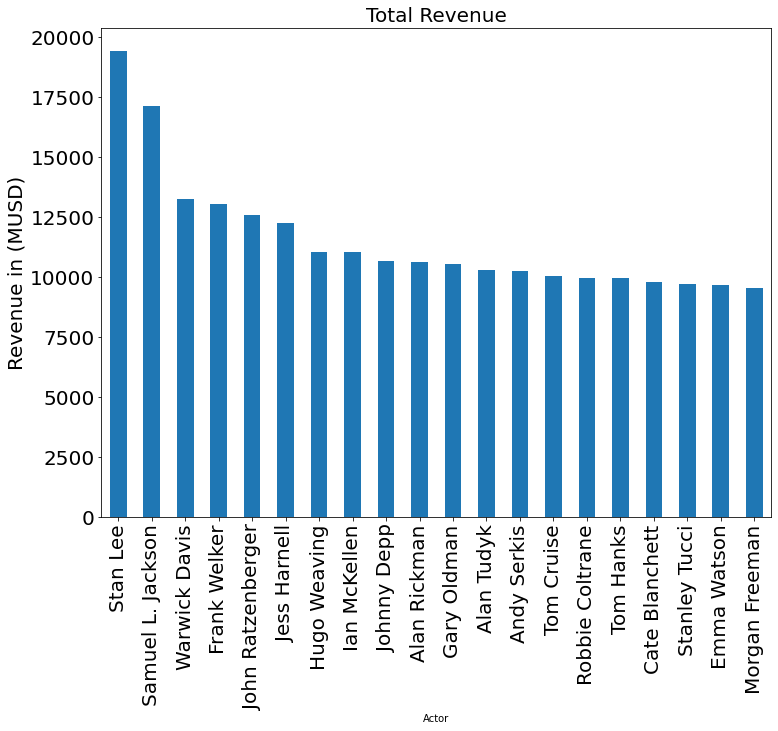

In [31]:
plt.figure(figsize=(12,9))
agg.Total_revenue.nlargest(20).plot(kind='bar',fontsize=20)
plt.title("Total Revenue",fontsize=20)
plt.ylabel("Revenue in (MUSD)", fontsize=20)
plt.show()

In [32]:
agg.Mean_revenue.nlargest(10)

Actor
April Marie Thomas   2787.97
Ashley Jeffery       2787.97
Austin Wilson        2787.97
Brandon Jelkes       2787.97
Bravita A. Threatt   2787.97
Carvon Futrell       2787.97
Chris Mala           2787.97
Christa Oliver       2787.97
Christopher Nolen    2787.97
Colin Bleasdale      2787.97
Name: Mean_revenue, dtype: float64

In [33]:
actor[actor['Actor']== 'Ashley Jeffery']

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
19995,Ashley Jeffery,Avatar,2787.97,7.20,185.07


In [34]:
# top actor by average Revenue  with minimum movie 10
agg[agg['Total_movie']>10].nlargest(10,"Mean_revenue")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movie
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Peter Mayhew,4820.72,803.45,6.70,12.30,11
Victoria De Mare,783.11,783.11,5.06,17.61,12


In [35]:
# Actor paling populer dengan movie lebih ddari 10
agg[agg['Total_movie']>10].nlargest(10,"Mean_pop")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movie
Actor,,,,,
Katy Mixon,1519.57,151.96,5.84,51.97,12
Terry Notary,6947.21,694.72,6.47,51.58,11
Mark Smith,2195.52,243.95,6.55,40.08,11
Jon Hamm,3449.35,191.63,6.33,39.42,25
Gal Gadot,5449.53,495.41,6.33,37.39,11
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Keith Jardine,1062.49,212.50,5.96,32.00,11
Karen Gillan,1834.67,305.78,6.78,31.38,12
